# Analyse des temps de parole (Work in progress)

In [1]:
#import bibliotheque de fonction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fonction.perso_stats as perso_stats

In [2]:
#import donnée
eu2024 = pd.read_csv('donnee_contruite/temps_paroles_EU2024.csv')

Vue générale :<br>
20 % des interventions sur toute les chaines font 80% des temps de paroles.<br>
Il y a un indice de gini de 0.83 ce qui correspond à une grande inégalité du temps de paroles<br>

indice de gini general : 0.8304638931315592


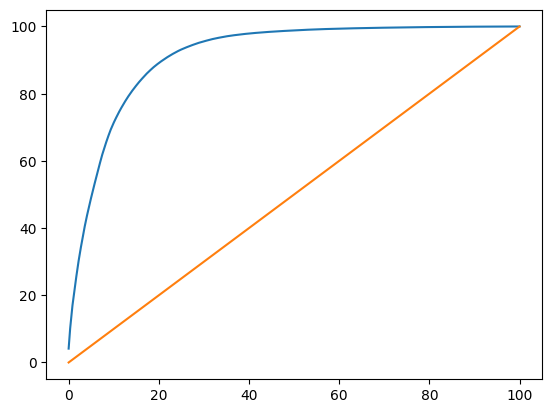

In [3]:
fig,ax =plt.subplots()
print('indice de gini general :',perso_stats.courbe_Lorentz(plt_ax=ax,df=eu2024,colonne='Durée en seconde'))


In [4]:
liste_media = list(eu2024['Nom du media'].unique())
liste_type_media = list(eu2024['Type de media'].unique())

indice de gini radio: 0.8259700940991519
indice de gini TV info continue: 0.8205635987512214
indice de gini TV généraliste: 0.7931910560384015


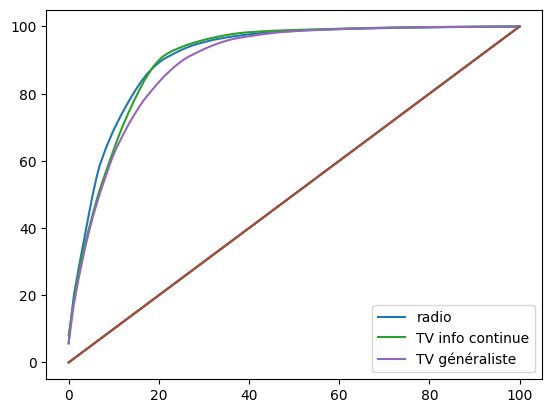

In [5]:
fig,ax =plt.subplots()
for type in liste_type_media:
    data=eu2024[eu2024['Type de media']==type]
    print('indice de gini '+type+':',perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=type))
    ax.legend()


Les radios fournissent en général plus d'égalité du temps de parole.<br>
Enfin juste un peu<br>

In [6]:
liste_media

['BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_']

RMC decouverte et BFM business n ont pas de temps de paroles, division par 0 je dois les enlever

indice de gini BFMTV: 0.8781559037595209
indice de gini C8: 0.8273309404784086
indice de gini Cnews: 0.880887087681246
indice de gini Euronews: 1.0898278862889186
indice de gini Europe1: 0.8789073536921395
indice de gini France2: 0.8474600664145823
indice de gini France24: 0.8738974789708802
indice de gini France3: 0.6171622286054393
indice de gini France5: 0.917927471496107
indice de gini FranceCulture: 0.8424664182001703
indice de gini FranceInfo: 0.861392746937534
indice de gini FranceInter: 0.8673263394777773
indice de gini LCI: 0.8900233441294014
indice de gini M6: 0.678791658005958
indice de gini RFI: 0.7753652201587152
indice de gini RMC-Story: 0.7963329108576254
indice de gini RMC: 0.8886135544416076
indice de gini RTL: 0.860663492817375
indice de gini RadioClassique: 0.7137250586854458
indice de gini SudRadio: 0.8136053479269852
indice de gini TF1: 0.7762874845105332
indice de gini TMC: 0.8003543944916968
indice de gini TV5Monde: 0.8173285573379013
indice de gini franceinfo_: 

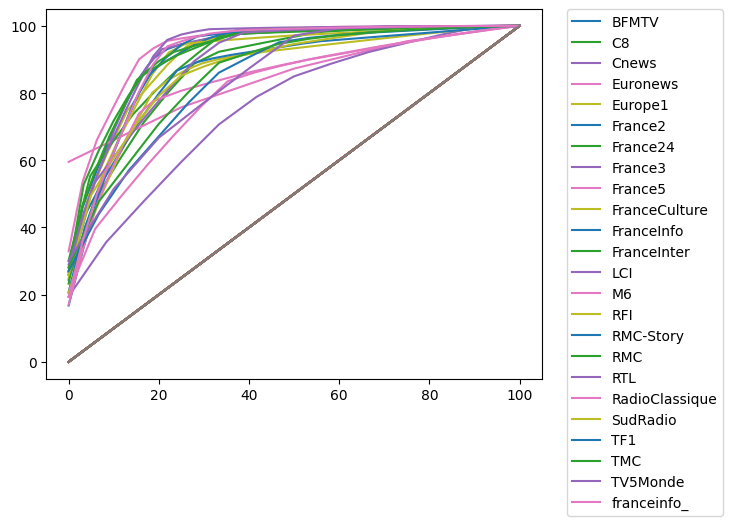

In [7]:
fig,ax =plt.subplots()
liste_media=[#'BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 #'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_'
 ]
 
dico_gini_media = {}
for media in liste_media:
    data=eu2024[eu2024['Nom du media']==media]
    indice = perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=media)
    print('indice de gini '+media+':',indice)
    dico_gini_media[media] = float(indice)
    ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Classement des medias du moins égalitaire au plus égalitaire selon l indice de Gini :

In [8]:
for key in sorted(dico_gini_media, key = dico_gini_media.get, reverse=True) :
    print (key,':', dico_gini_media[key])

Euronews : 1.0898278862889186
France5 : 0.917927471496107
LCI : 0.8900233441294014
RMC : 0.8886135544416076
Cnews : 0.880887087681246
Europe1 : 0.8789073536921395
BFMTV : 0.8781559037595209
France24 : 0.8738974789708802
FranceInter : 0.8673263394777773
FranceInfo : 0.861392746937534
franceinfo_ : 0.8608607096205073
RTL : 0.860663492817375
France2 : 0.8474600664145823
FranceCulture : 0.8424664182001703
C8 : 0.8273309404784086
TV5Monde : 0.8173285573379013
SudRadio : 0.8136053479269852
TMC : 0.8003543944916968
RMC-Story : 0.7963329108576254
TF1 : 0.7762874845105332
RFI : 0.7753652201587152
RadioClassique : 0.7137250586854458
M6 : 0.678791658005958
France3 : 0.6171622286054393


Cette liste est concu avec une regle : chaque liste doit avoir le meme temps de parole. Ainsi une chaine qui lutte contre les autres en mettant en avant une liste peut representative va donc etre classé non égalitaire.<br>
travail en cours : faire des couleurs pour classé les partie en fonction de leurs couleur politique.<br>
classé les media en fonction de leur preference politique<br>
faire un rendement voie/temps d'antenne pour voir si il y a un influence du temps d'antenne sur les voies<br>


Vue générale :

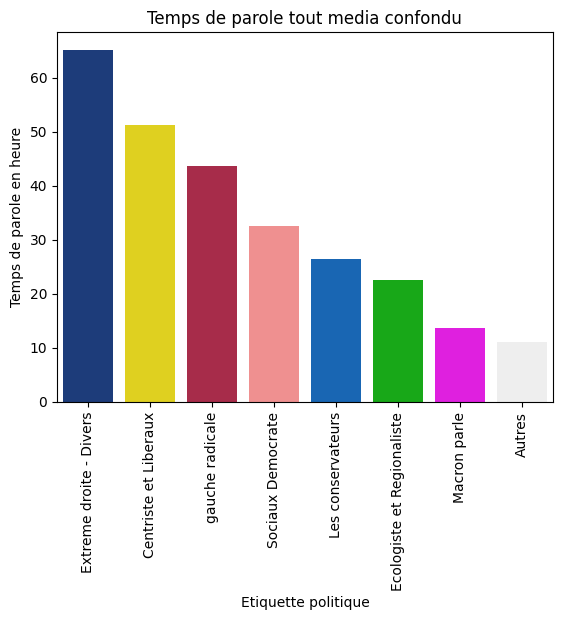

In [13]:
# preparation data
eu2024_couleur_gen = eu2024.groupby(by='Couleur').agg({'Durée en seconde':'sum'}).reset_index()
eu2024_couleur_gen["Temps de parole en heure"] = eu2024_couleur_gen['Durée en seconde']/3600
eu2024_couleur_gen = eu2024_couleur_gen.sort_values(by='Temps de parole en heure',ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#0D378A", "#ffeb00","#bb1840","#ff8080","#0066cc","#00c000","#FF00FF","#eeeeee"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
sns.barplot(data=eu2024_couleur_gen,x='Couleur',y='Temps de parole en heure',hue='Couleur')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()


Pour ces élections, l'extreme-droite à eu plus de 60 heures de temps de paroles.<br>
Si on suis la logique de l'arcom, le RN étant en tête des sondages, c'est légal.<br>
https://www.lesechos.fr/elections/europeennes/sondage-europeennes-2024-tous-les-resultats-du-barometre-eurotrack-2090451 <br>
<br>
Par contre, il faut aussi prendre ne compte les résultats des précédentes élections.<br>
https://fr.wikipedia.org/wiki/%C3%89lections_europ%C3%A9ennes_de_2019_en_France <br>
<br>


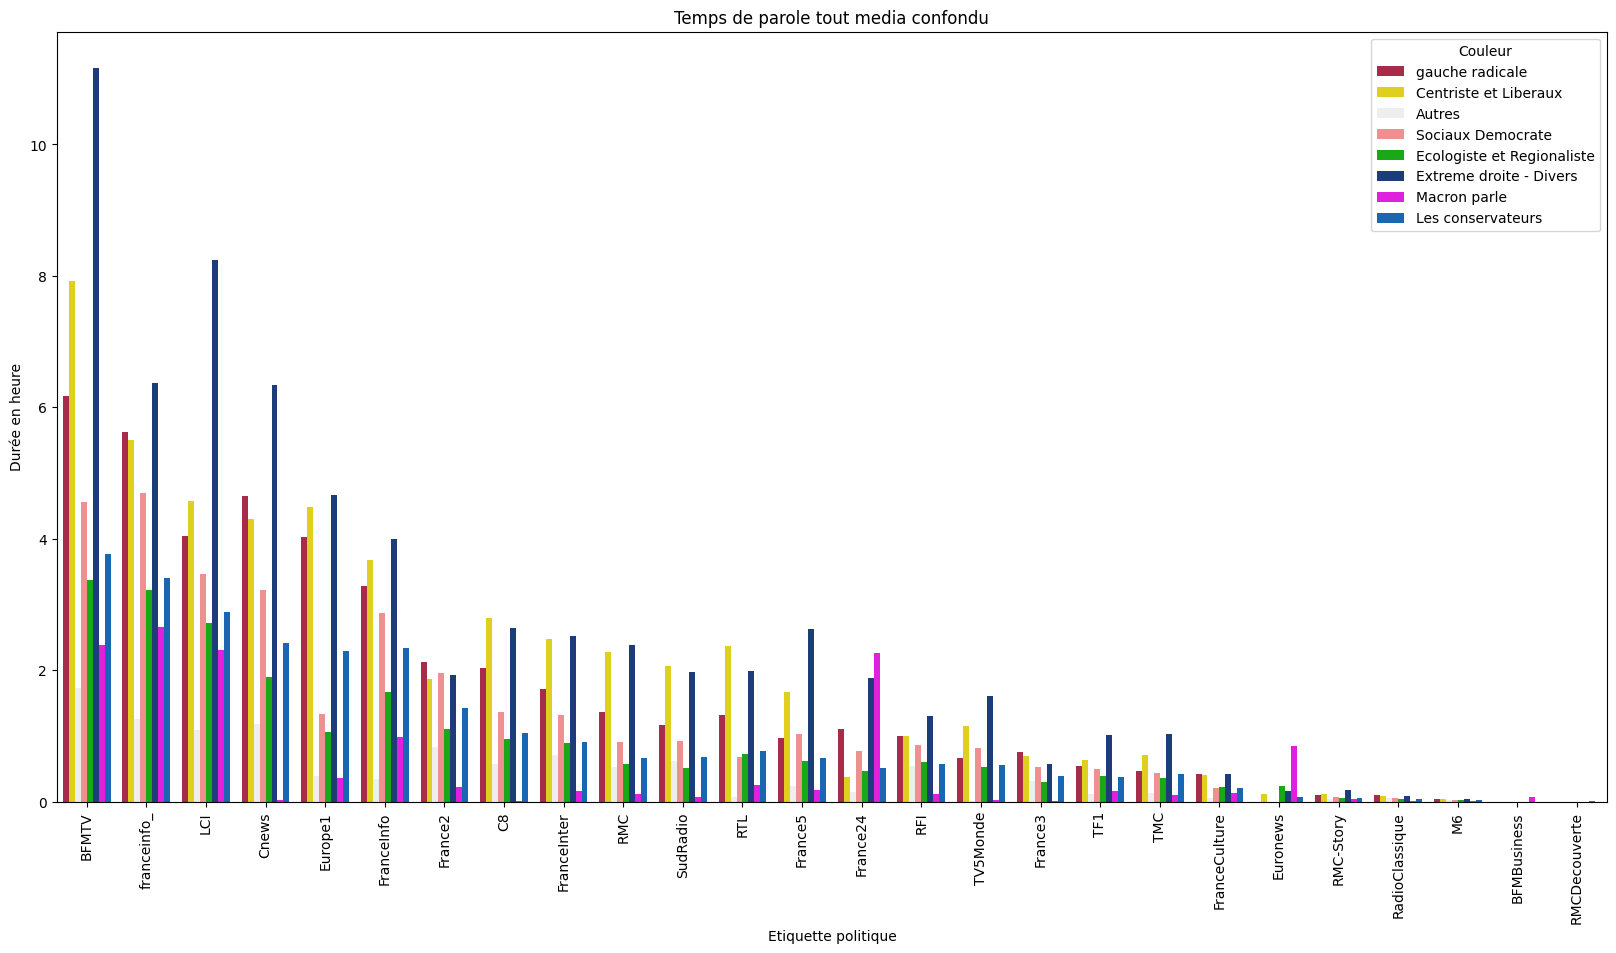

In [21]:
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#bb1840", "#ffeb00","#eeeeee","#ff8080","#00c000","#0D378A","#FF00FF","#0066cc"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Durée en heure',hue='Couleur',errorbar=None,estimator='sum')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show()

En regardant les pics extremes droites, 

In [19]:
eu2024.sort_values(by="Temps total",ascending=False).head(40)

,Listes candidates,Total période (durée),Nom du media,Type de media,Durée en seconde,Durée en minute,Temps total,Couleur,Durée en heure
20,"NON A L?UE ET A L?OTAN, COMMUNISTES POUR LA PA...",00:02:21,BFMTV,TV info continue,141,2.350000,159919,gauche radicale,0.039167
2,BESOIN D?EUROPE,07:55:17,BFMTV,TV info continue,28517,475.283333,159919,Centriste et Liberaux,7.921389
1,ALLIANCE RURALE,00:20:23,BFMTV,TV info continue,1223,20.383333,159919,Autres,0.339722
4,DEFENDRE LES ENFANTS,00:02:05,BFMTV,TV info continue,125,2.083333,159919,Autres,0.034722
3,CHANGER L?EUROPE,00:19:42,BFMTV,TV info continue,1182,19.700000,159919,Sociaux Democrate,0.328333
5,DEMOCRATIE REPRESENTATIVE,00:02:00,BFMTV,TV info continue,120,2.000000,159919,Autres,0.033333
6,ECOLOGIE POSITIVE ET TERRITOIRES,00:04:20,BFMTV,TV info continue,260,4.333333,159919,Ecologiste et Regionaliste,0.072222
8,EUROPE ECOLOGIE,03:17:46,BFMTV,TV info continue,11866,197.766667,159919,Ecologiste et Regionaliste,3.296111
7,ESPERANTO LANGUE COMMUNE,00:03:09,BFMTV,TV info continue,189,3.150000,159919,Autres,0.052500
11,FREE PALESTINE,00:02:00,BFMTV,TV info continue,120,2.000000,159919,Autres,0.033333


In [20]:
eu2024_couleur_gen

,Couleur,Durée en heure,Temps de parole en heure
3,Extreme droite - Divers,65.169722,65.169722
1,Centriste et Liberaux,51.346389,51.346389
7,gauche radicale,43.711389,43.711389
6,Sociaux Democrate,32.582500,32.582500
4,Les conservateurs,26.496389,26.496389
2,Ecologiste et Regionaliste,22.527778,22.527778
5,Macron parle,13.582500,13.582500
0,Autres,11.025556,11.025556
